In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('wine_data.csv',header = None,usecols=[0,1,2])
df.columns = ['Class lable','Alcohol','Malic acid']

In [11]:
df.sample(5)

,Class lable,Alcohol,Malic acid
174,3,13.40,3.91
119,2,12.00,3.43
3,1,14.37,1.95
45,1,14.21,4.04
155,3,13.17,5.19


<Axes: xlabel='Alcohol', ylabel='Density'>

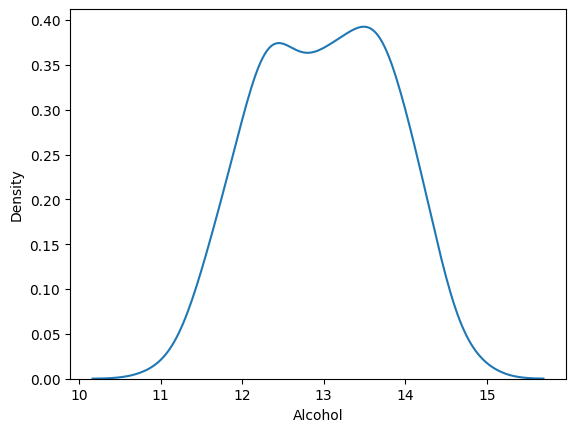

In [16]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

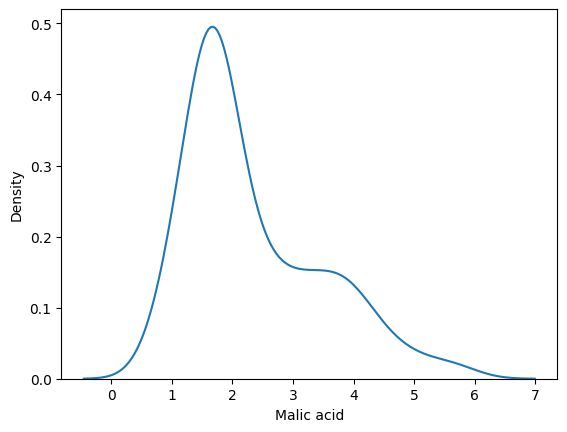

In [17]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

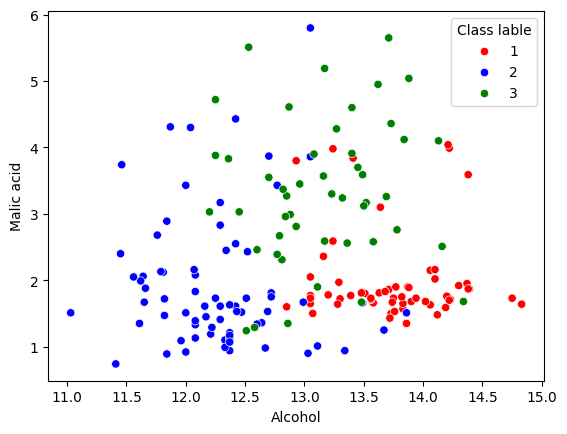

In [30]:
sns.scatterplot(x='Alcohol',y='Malic acid',data = df,hue='Class lable',palette={1:'red',2:'blue',3:'green'})

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class lable',axis = 1),df['Class lable'],test_size=0.3, random_state=0)

X_train.shape,X_test.shape

((124, 2), (54, 2))

# Normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler();

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [41]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


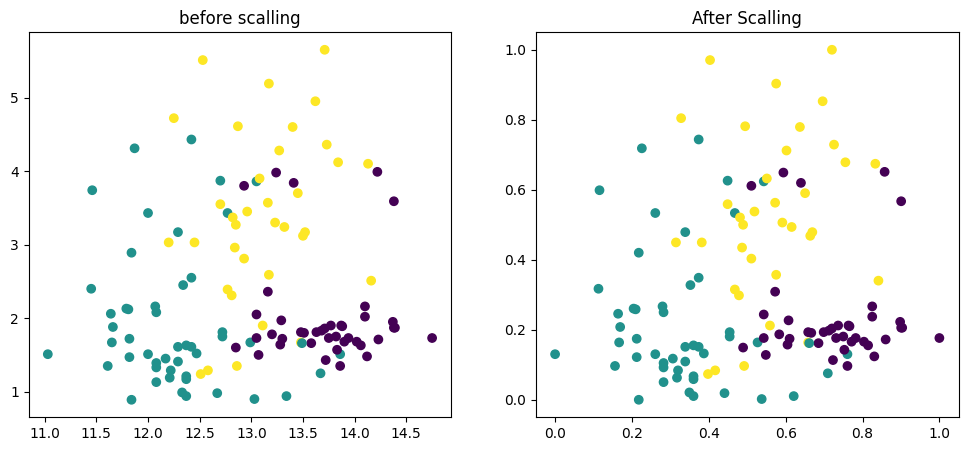

In [59]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('before scalling')

ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scalling')

plt.show()

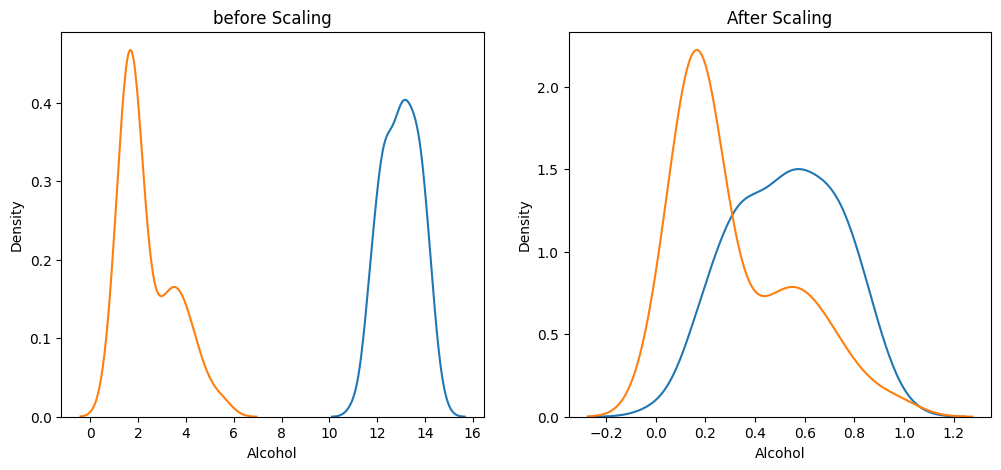

In [67]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)
ax1.set_title("before Scaling")

sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
ax2.set_title("After Scaling")
plt.show()